In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import gmaps
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy import stats
import requests
import time
import os
from scipy.stats import linregress

# Output File (CSV)
output_data_file20 = "csv_folder/2020/03.csv"
output_data_file19 = "csv_folder/2019/03.csv"
output_data_file18 = "csv_folder/2018/03.csv"
output_data_file17 = "csv_folder/2017/03.csv"
output_data_file16 = "csv_folder/2016/05.csv"
output_data_file15 = "csv_folder/2015/05.csv"
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
import gmaps

from api_keys import g_key

In [2]:
air_df = pd.read_csv(output_data_file20)

air_df1 = pd.read_csv(output_data_file15)
air_df.head()

,id,listing_url,host_id,host_url,host_name,host_is_superhost,host_neighbourhood,host_listings_count,street,neighbourhood,...,has_availability,number_of_reviews,number_of_reviews_ltm,review_scores_rating,require_guest_profile_picture,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,reviews_per_month,host_acceptance_rate
0,109,https://www.airbnb.com/rooms/109,521,https://www.airbnb.com/users/show/521,Paolo,f,Culver City,1.0,"Culver City, CA, United States",Culver City,...,t,2,0,80.0,t,1,1,0,0.02,0.00
1,344,https://www.airbnb.com/rooms/344,767,https://www.airbnb.com/users/show/767,Melissa,f,Burbank,1.0,"Burbank, CA, United States",Burbank,...,t,8,2,97.0,f,1,1,0,0.18,0.22
2,2708,https://www.airbnb.com/rooms/2708,3008,https://www.airbnb.com/users/show/3008,Chas.,t,Hollywood,2.0,"Los Angeles, CA, United States",Hollywood,...,t,23,8,98.0,f,2,0,2,0.33,0.94
3,2732,https://www.airbnb.com/rooms/2732,3041,https://www.airbnb.com/users/show/3041,Yoga Priestess,f,Santa Monica,2.0,"Santa Monica, CA, United States",Santa Monica,...,t,21,3,94.0,f,2,1,1,0.20,0.75
4,2864,https://www.airbnb.com/rooms/2864,3207,https://www.airbnb.com/users/show/3207,Bernadine,f,Bellflower,1.0,"Bellflower, CA, United States",Bellflower,...,t,0,0,NaN,f,1,1,0,NaN,NaN


# Variable Lists


In [3]:

record_counter = 0
set_counter = 0
# Starting URL for Weather Map API Call
url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json" + g_key
print(url)
# print('Start of Request')


# for city in cities:
#     query_url = url + "&q=" + city
#     # Get weather data
#     response = requests.get(query_url).json()
#     if record_counter < 40:  
#         record_counter += 1
#     else:
#         set_counter += 1
#         record_counter = 0

#     print('Processing record {} of set {} -> {}'.format(record_counter, set_counter, city))
# #     print(url)
#     try:
        
#         cloud.append(response['clouds']['all'])
#         humidity.append(response['main']['humidity'])
#         temperature.append(response['main']['temp_max'])
#         latitude.append(response['coord']['lat'])
#         longitude.append(response['coord']['lon'])
#         wind.append(response['wind']['speed'])
#         country.append(response['sys']['country'])
#         date.append(response['dt'])
#         new_cities.append(city)
#     except:
#         print("City not found!")
#         pass

# print('End of Data')

https://maps.googleapis.com/maps/api/place/nearbysearch/json


In [4]:
# air_df= air_df['Price']
# c = air_df.loc[(air_df['price'] > 9999)]
# c


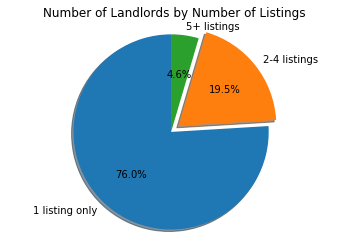

In [5]:
# Show the number of landlords by how many listings they have?
host_number = air_df.groupby(['host_id'])
# host_number = host_number.groupyby(['host_id'])
host_number = host_number.count()
#22274 hosts or landlords
#host_number.count()

host_number1 = host_number.loc[(host_number['id']) == 1]
host_number1 = host_number1['id'].count()
#16919 landlords with 1 listing only
# host_number1

host_number2 = host_number.loc[(host_number['id'] >= 2) & (host_number['id'] < 5)]
host_number2 = host_number2['id'].count()
#4339 landlords with 2-4 listings only
# host_number2

host_number5 = host_number.loc[(host_number['id'] >= 5)]
host_number5 = host_number5['id'].count()
#20 landlords with 50+ listings only
# host_number5

labels = '1 listing only', '2-4 listings', '5+ listings'
sizes = [host_number1, host_number2, host_number5]
explode = (0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Number of Landlords by Number of Listings")
plt.show()


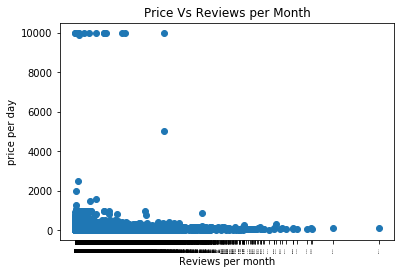

In [6]:
# Q Any relationship between the number of reviews_per_month and price per night for 1 bedroom listings 
# Varables: [‘price’] and [‘reviews_per_month’] where [‘bedrooms’] == 1
# H The higher number of reviews per month has a positive correlation with the price per night
# T-Test
# H0: μb = μ a

new_df1 = air_df.loc[(air_df['bedrooms'] == 1)]
reviews_month = new_df1['reviews_per_month']
price_paid = new_df1['price']

ran_dict = {
    "Reviews": reviews_month,
    "Price": price_paid
}

new_df2 = pd.DataFrame(ran_dict)
new_df3 = new_df2.dropna(axis=0, how='any', inplace=False)

y = new_df3['Price']
x = new_df3['Reviews']
plt.scatter(x, y)
plt.xticks(x, rotation=90,fontsize=2)
plt.xlabel('Reviews per month')
plt.ylabel('price per day')
plt.title("Price Vs Reviews per Month")
#good_dataset_cap
plt.show()

In [7]:
print(f"The correlation coefficient {round(st.pearsonr(x,y)[0],2)}. The slope of the coefficient is -0.01. R2, slope, p-value")
stats.ttest_ind(x, y, equal_var=False)

The correlation coefficient -0.01. The slope of the coefficient is -0.01, which shows a very weak or no linear relationship between price and the number of reviews per listing. The T-test is -47.26. The P-Value is 0.0.


Ttest_indResult(statistic=-47.26477478809087, pvalue=0.0)

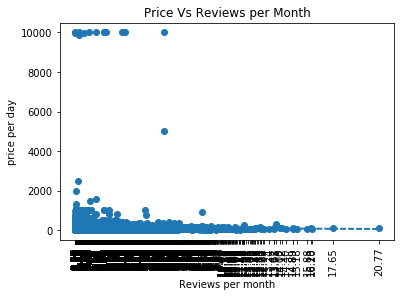

In [8]:
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(x, y)
vc_fit = vc_slope * x + vc_int

# year = crime_data.iloc[:,0]
# violent_crime_rate = crime_data.iloc[:,3]
plt.scatter(x,y)
plt.plot(x,vc_fit,"--")
plt.xticks(x, rotation=90)
plt.xlabel('Reviews per month')
plt.ylabel('price per day')
plt.title("Price Vs Reviews per Month")
plt.show()

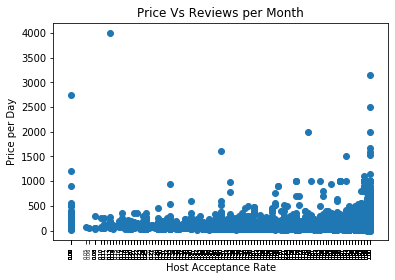

In [27]:
# Q Any relationship between host_acceptance_rate and price per night for 1 bedroom listings
# Varables: [‘price’] [‘host_acceptance_rate’] where [‘bedrooms’] == 1
# H The higher number of host_acceptance_rate per month has a negative correlation with the price per night

ran_var = air_df.loc[(air_df['bedrooms'] == 1)]
ran_var = air_df.loc[(air_df['price'] < 5000)]
acc_rate = ran_var['host_acceptance_rate']
# price_paid = new_df1['price']
acc_dict = {
    "host_acceptance": acc_rate,
    "Price_acc": price_paid
}



acc_df2 = pd.DataFrame(acc_dict)
acc_df3 = acc_df2.dropna(axis=0, how='any', inplace=False)

y2 = acc_df3['Price_acc']
x2 = acc_df3['host_acceptance']
plt.scatter(x2, y2)
plt.xticks(x2, rotation=90,fontsize=5)
plt.xlabel('Host Acceptance Rate')
plt.ylabel('Price per Day')
plt.title("Price Vs Reviews per Month")
#good_dataset_cap
plt.show()

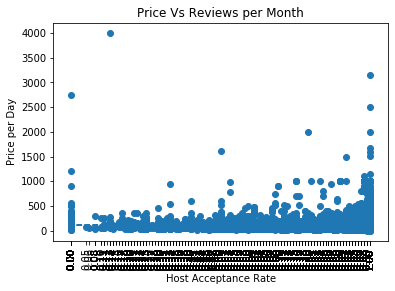

In [28]:
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(x2, y2)
vc_fit = vc_slope * x2 + vc_int

# year = crime_data.iloc[:,0]
# violent_crime_rate = crime_data.iloc[:,3]
plt.scatter(x2,y2)
plt.plot(x2,vc_fit,"--")
plt.xticks(x2, rotation=90)
plt.xlabel('Host Acceptance Rate')
plt.ylabel('Price per Day')
plt.title("Price Vs Reviews per Month")
plt.show()

In [17]:
print(f"The correlation coefficient {round(st.pearsonr(x2,y2)[0],2)}. R2, slope, p-value")
stats.ttest_ind(x2, y2, equal_var=False)

The correlation coefficient -0.0. The slope of the coefficient is -0.01, which shows a very weak or no linear relationship between price and the number of reviews per listing. The T-test is -47.26. The P-Value is 0.0.


Ttest_indResult(statistic=-37.51200787457121, pvalue=7.530068619534679e-297)

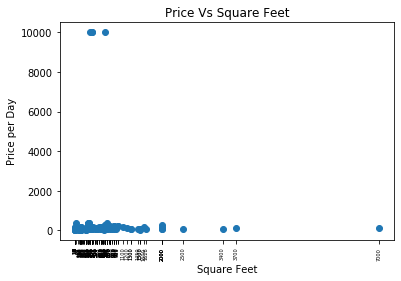

In [21]:
# Q Relationship between price and square feet?
# H Price has a positive correlation with square feet
# Variables: [‘price’] and [‘square_feet’] where [‘bedrooms’] == 1 or [‘Accommodates’] == 2

ran_var2 = air_df.loc[(air_df['bedrooms'] == 1)]
square_feet = ran_var2['square_feet']
# price_paid = new_df1['price']
square_dict = {
    "square_feet": square_feet,
    "Price_sq": price_paid
}



square_df2 = pd.DataFrame(square_dict)
square_df3 = square_df2.dropna(axis=0, how='any', inplace=False)

y3 = square_df3['Price_sq']
x3 = square_df3['square_feet']
plt.scatter(x3, y3)
plt.xticks(x3, rotation=90,fontsize=5)
plt.xlabel('Square Feet')
plt.ylabel('Price per Day')
plt.title("Price Vs Square Feet")
#good_dataset_cap
#159 non null values for square feet
plt.show()

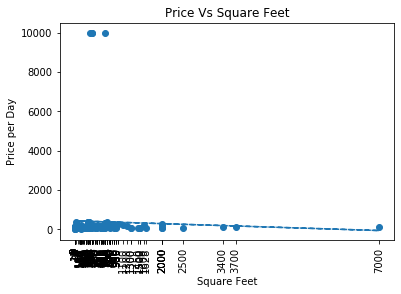

In [23]:
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(x3, y3)
vc_fit = vc_slope * x3 + vc_int

# year = crime_data.iloc[:,0]
# violent_crime_rate = crime_data.iloc[:,3]
plt.scatter(x3,y3)
plt.plot(x3,vc_fit,"--")
plt.xticks(x3, rotation=90)
plt.xlabel('Square Feet')
plt.ylabel('Price per Day')
plt.title("Price Vs Square Feet")
plt.show()

In [25]:
print(f"The correlation coefficient {round(st.pearsonr(x3,y3)[0],2)}. The slope of the coefficient is -0.03. R2, slope, p-value")
stats.ttest_ind(x3, y3, equal_var=False)

The correlation coefficient -0.03. The slope of the coefficient is -0.03, which shows very weak or no linear relationship between price and the square feet of the airbnb properties. The T-test is 1.83. The P-Value is 0.068. The results are not statistically significant.


Ttest_indResult(statistic=1.832403103136584, pvalue=0.06818885223379507)

In [26]:
d = air_df.loc[(air_df['price'] > 9999)]
d

,id,listing_url,host_id,host_url,host_name,host_is_superhost,host_neighbourhood,host_listings_count,street,neighbourhood,...,has_availability,number_of_reviews,number_of_reviews_ltm,review_scores_rating,require_guest_profile_picture,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,reviews_per_month,host_acceptance_rate
2111,2954682,https://www.airbnb.com/rooms/2954682,5763024,https://www.airbnb.com/users/show/5763024,Yun,f,Island of Hawaiʻi,2.0,"Malibu, CA, United States",Malibu,...,t,0,0,NaN,f,2,2,0,NaN,0.60
2736,4029464,https://www.airbnb.com/rooms/4029464,10156476,https://www.airbnb.com/users/show/10156476,Robert,f,Santa Monica,9.0,"Beverly Hills, CA, United States",Bel Air/Beverly Crest,...,t,0,0,NaN,f,4,4,0,NaN,0.68
10909,16913896,https://www.airbnb.com/rooms/16913896,37704152,https://www.airbnb.com/users/show/37704152,Tyler,f,Mid-Wilshire,1.0,"Los Angeles, CA, United States",Mid-Wilshire,...,t,0,0,NaN,f,1,1,0,NaN,NaN
11144,17298758,https://www.airbnb.com/rooms/17298758,21698346,https://www.airbnb.com/users/show/21698346,Alex,f,Westwood,1.0,"Los Angeles, CA, United States",Westwood,...,t,1,0,100.0,f,1,1,0,0.03,NaN
13846,20470251,https://www.airbnb.com/rooms/20470251,23458477,https://www.airbnb.com/users/show/23458477,Marina,f,Bel Air/Beverly Crest,42.0,"Beverly Hills, CA, United States",Beverly Hills,...,t,0,0,NaN,f,37,37,0,NaN,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36734,42066138,https://www.airbnb.com/rooms/42066138,281933074,https://www.airbnb.com/users/show/281933074,The Standard Downtown,f,Downtown,6.0,"Los Angeles, CA, United States",Downtown,...,t,0,0,NaN,f,6,0,6,NaN,1.00
36962,42195600,https://www.airbnb.com/rooms/42195600,306014339,https://www.airbnb.com/users/show/306014339,The Prospect Hollywood,f,Central LA,0.0,"Los Angeles, CA, United States",Hollywood,...,t,0,0,NaN,f,2,0,2,NaN,NaN
36963,42195911,https://www.airbnb.com/rooms/42195911,306014339,https://www.airbnb.com/users/show/306014339,The Prospect Hollywood,f,Central LA,0.0,"Los Angeles, CA, United States",Hollywood,...,t,0,0,NaN,f,2,0,2,NaN,NaN
37635,42515360,https://www.airbnb.com/rooms/42515360,295744253,https://www.airbnb.com/users/show/295744253,Hoxton,f,Downtown,3.0,"Los Angeles, CA, United States",Downtown,...,t,2,2,100.0,f,3,0,3,2.00,1.00
